In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

from itertools import product
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB # Import Naive Bayes Classifier
from sklearn.svm import SVC, LinearSVC # Import SVM Classifier
from sklearn.neighbors import KNeighborsClassifier # Import KNN Classifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from pprint import pprint
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import ClusterCentroids
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold
from prettytable import PrettyTable
from scipy import stats
from matplotlib.pyplot import pie, axis, show
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
from sklearn.feature_selection import VarianceThreshold, SelectKBest, mutual_info_classif, SelectFromModel, RFE
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

from helpers import train_model, plot_conf_mat, plot_roc, plot_roc_micro, plot_roc_macro, plot_pie_chart

random.seed(0)

In [2]:
X_cs_15 = np.load('npy_data/X_combinedSampling_15Features_task1.npy')
y_cs_15 = np.load('npy_data/y_combinedSampling_15Features_task1.npy')
print('X_cs_15.shape, y_cs_15.shape', X_cs_15.shape, y_cs_15.shape)

X_cs_15.shape, y_cs_15.shape (27209, 15) (27209,)


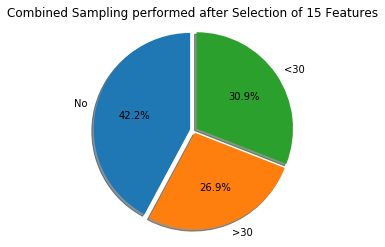

In [5]:
plot_pie_chart(['No', '>30', '<30'], y_cs_15, 15)

In [3]:
kfold = StratifiedKFold(10, random_state=False, shuffle=True)

folds_15 = kfold.split(X_cs_15, y_cs_15)
folds_15 = [(train, test) for train, test in folds_15]

In [4]:
data_classes_15  = []

for i in range(3):
    data_classes_15.append(len(y_cs_15[y_cs_15==i]))
    
cls2clr = {
    0: 'red',
    1: 'green',
    2: 'blue'
}
clf2clr = {
    0: 'red',
    1: 'green',
    2: 'blue',
    3: 'purple',
    4: 'cornflowerblue',
}

----------------15 Selected Features----------------
+---------------+-----------------------+
|    XGBoost    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         5.1452        |
|    Accuracy   |   0.7829762117084982  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7942628522361683 | 0.7051955164013831 | 0.8204984805638649 |
|     Recall     | 0.8369529130549228 | 0.5876836714154721 | 0.8793069555811004 |
|  Specificity   | 0.8419313850063531 | 0.9096397091156418 | 0.9137881455731321 |
|    F1-score    | 0.8150052243600419 | 0.6410047251744314 | 0.8488469244193544 |
+----------------+--------------------+--------------------+--------------------+
+-----------+--------+-----------+-----

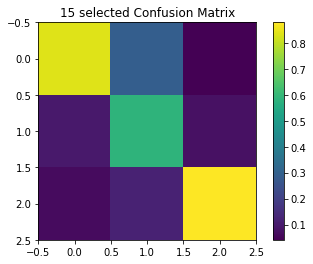

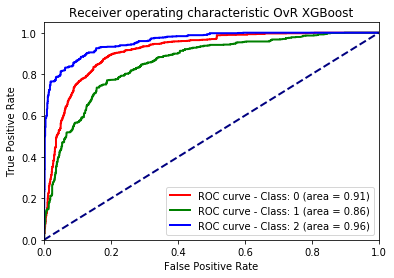

In [5]:
tables, xgboost_metrics_15 = train_model(model_name='XGBoost', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xgboost_metrics_15, data_classes_15, cls2clr, 'XGBoost')

----------------15 Selected Features----------------
+---------------+-----------------------+
|    AdaBoost   | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |   0.5117999999999999  |
|    Accuracy   |   0.7189898691008928  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.7525174701934887 | 0.597651752047326  | 0.7660787049406583 |
|     Recall     | 0.727964520845791  | 0.545897352746032  | 0.8573291043068849 |
|  Specificity   | 0.8254129606099111 | 0.8645858749115567 | 0.8826566303941661 |
|    F1-score    | 0.7398572751909921 | 0.5703024069103539 | 0.8090937290078323 |
+----------------+--------------------+--------------------+--------------------+
+-----------+--------+-----------+-----

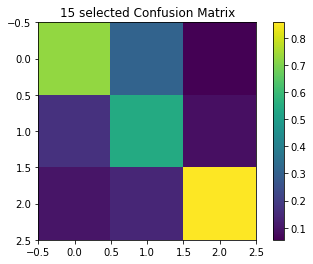

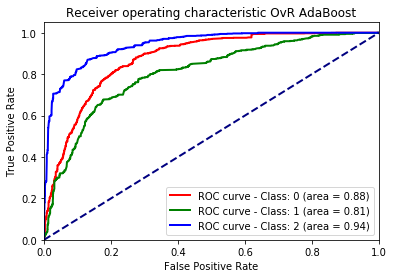

In [6]:
tables, adaboost_metrics_15 = train_model(model_name='AdaBoost', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(adaboost_metrics_15, data_classes_15, cls2clr, 'AdaBoost')

----------------15 Selected Features----------------
+---------------+-----------------------+
|     XTrees    | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         1.1625        |
|    Accuracy   |   0.9705611988455802  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.9535891792929059 | 0.974439545227353  | 0.991495927498889  |
|     Recall     | 0.9863109774188985 | 0.9314399615324402 | 0.983131296584487  |
|  Specificity   | 0.9649936467598474 | 0.990999389648813  | 0.996221620825926  |
|    F1-score    | 0.9696648978873654 | 0.9524269851958674 | 0.9872929502396163 |
+----------------+--------------------+--------------------+--------------------+
+-----------+---------+-----------+----

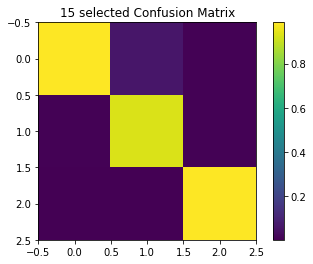

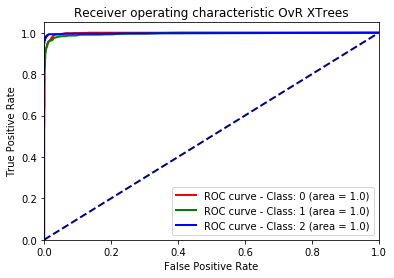

In [7]:
tables, xtrees_metrics_15 = train_model(model_name='XTrees', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(xtrees_metrics_15, data_classes_15, cls2clr, 'XTrees')

----------------15 Selected Features----------------
+---------------+-----------------------+
|      KNN      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |         0.7491        |
|    Accuracy   |   0.9054355692111467  |
+---------------+-----------------------+
+----------------+--------------------+--------------------+--------------------+
| Metric / Class |     Class - No     | Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+--------------------+--------------------+
|   Percision    | 0.878016617965806  | 0.9020017272358292 | 0.9486169068582386 |
|     Recall     | 0.9307703836246312 | 0.8329741909511774 | 0.9339497996108015 |
|  Specificity   |  0.90571791613723  | 0.9666618600647118 | 0.9773297249555556 |
|    F1-score    | 0.903598403159578  | 0.8660412269915139 | 0.9412190930284421 |
+----------------+--------------------+--------------------+--------------------+
+-----------+---------+-----------+----

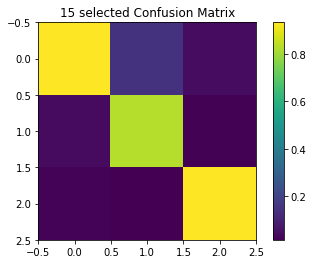

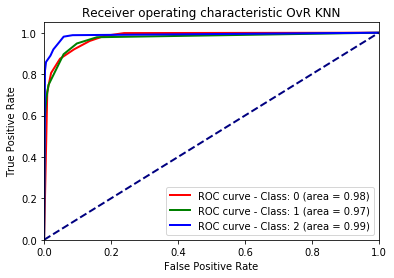

In [8]:
tables, knn_metrics_15 = train_model(model_name='KNN', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(knn_metrics_15, data_classes_15, cls2clr, 'KNN')

----------------15 Selected Features----------------
+---------------+-----------------------+
|       DT      | Avg. Accross 10 Folds |
+---------------+-----------------------+
| Training Time |  0.020999999999999998 |
|    Accuracy   |   0.7071192603281665  |
+---------------+-----------------------+
+----------------+--------------------+---------------------+--------------------+
| Metric / Class |     Class - No     |  Class - > 30 days  | Class - < 30 days  |
+----------------+--------------------+---------------------+--------------------+
|   Percision    | 0.7046376351870516 |  0.6264016211656143 | 0.7624728612766848 |
|     Recall     | 0.7656258606182604 | 0.47118380933211074 | 0.8326253103278815 |
|  Specificity   | 0.7650571791613723 |  0.8951052143973699 | 0.8837210546578647 |
|    F1-score    | 0.733079935728238  |  0.5348883924874007 | 0.7958849757281872 |
+----------------+--------------------+---------------------+--------------------+
+-----------+--------+---------

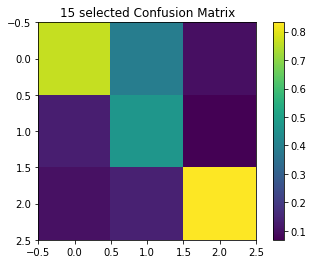

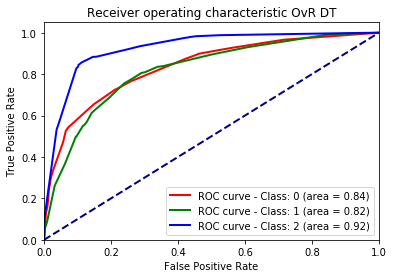

In [9]:
tables, dt_metrics_15 = train_model(model_name='DT', 
                                         X=X_cs_15, y=y_cs_15, folds=folds_15, 
                                         data_classes=data_classes_15)
table1, table2, conf_mat, conf_mat_norm = tables
print('----------------15 Selected Features----------------')
print(table1)
print(table2)
print(conf_mat)
plot_conf_mat(conf_mat_norm, '15 selected')
plot_roc(dt_metrics_15, data_classes_15, cls2clr, 'DT')

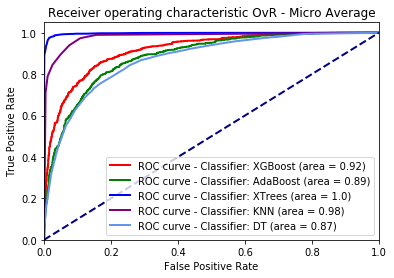

In [10]:
plot_roc_micro([xgboost_metrics_15,
                adaboost_metrics_15,
                xtrees_metrics_15,
                knn_metrics_15,
                dt_metrics_15], 
               ['XGBoost',
                'AdaBoost',
                'XTrees',
                'KNN',
                'DT'], 
               clf2clr)

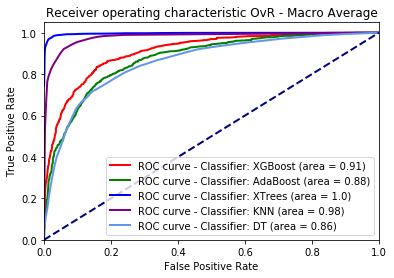

In [11]:
plot_roc_macro([xgboost_metrics_15,
                adaboost_metrics_15,
                xtrees_metrics_15,
                knn_metrics_15,
                dt_metrics_15], 
               ['XGBoost',
                'AdaBoost',
                'XTrees',
                'KNN',
                'DT'], 
               clf2clr)

In [12]:
all_scores = [xgboost_metrics_15['specificity'], 
              adaboost_metrics_15['specificity'], 
              xtrees_metrics_15['specificity'], 
              knn_metrics_15['specificity'], 
              dt_metrics_15['specificity']]

all_pairs_idx = set()
all_clf = ['XGBoost',
           'AdaBoost',
           'XTrees',
           'KNN',
           'DT']
for i in range(5):
    for j in range(i + 1, 5):
        all_pairs_idx.add((i, j))
        print(all_clf[i], 'vs', all_clf[j], '--', (i, j))
# print(all_pairs_idx)

XGBoost vs AdaBoost -- (0, 1)
XGBoost vs XTrees -- (0, 2)
XGBoost vs KNN -- (0, 3)
XGBoost vs DT -- (0, 4)
AdaBoost vs XTrees -- (1, 2)
AdaBoost vs KNN -- (1, 3)
AdaBoost vs DT -- (1, 4)
XTrees vs KNN -- (2, 3)
XTrees vs DT -- (2, 4)
KNN vs DT -- (3, 4)


In [30]:
K = 10
paired_ttest = {}
for pair in all_pairs_idx:
    clf1, clf2 = pair
    score_diff = []
    for i in range(K):
        score_diff.append(all_scores[clf1][i] - all_scores[clf2][i])
    t, p = stats.ttest_rel(all_scores[clf1], all_scores[clf2])
    paired_ttest[pair] = {
        'score_diff': score_diff,
        't_stat': np.round(t, 2), 
        'p_value': np.round(p, 8), 
    }

In [31]:
t = PrettyTable(['Classifier-1 vs Classifier-2', 'avg_diff', 'stdev_diff', 'pvalue'])#, 'tvalue'])
for pair in all_pairs_idx:
    clf1, clf2 = pair
    t.add_row([all_clf[clf1] + ' vs ' + all_clf[clf2], 
               "{:0.2f}".format(np.mean(paired_ttest[pair]['score_diff'])), 
               "{:0.2f}".format(np.std(paired_ttest[pair]['score_diff'])), 
#                paired_ttest[pair]['t_stat'],
               np.sum(paired_ttest[pair]['p_value'])])
print(t)

+------------------------------+----------+------------+------------------------+
| Classifier-1 vs Classifier-2 | avg_diff | stdev_diff |         pvalue         |
+------------------------------+----------+------------+------------------------+
|     XGBoost vs AdaBoost      |   0.03   |    0.01    | 0.00014022999999999998 |
|      AdaBoost vs XTrees      |  -0.13   |    0.01    |          0.0           |
|       AdaBoost vs KNN        |  -0.09   |    0.01    |          0.0           |
|        AdaBoost vs DT        |   0.01   |    0.04    |       0.62487758       |
|         XTrees vs DT         |   0.14   |    0.05    |        4.1e-07         |
|        XTrees vs KNN         |   0.03   |    0.02    |         8e-08          |
|        XGBoost vs DT         |   0.04   |    0.03    |       0.06531907       |
|        XGBoost vs KNN        |  -0.06   |    0.01    |          0.0           |
|          KNN vs DT           |   0.10   |    0.04    |        7.65e-06        |
|      XGBoost v